# Your favorite color makes learning more adaptable and precise

This MATLAB Notebook contains implementation of some described analysis in <b>Your favorite color makes learning more adaptable and precise, Farashahi et. al 2017. </b> In this work, we propose that learning reward values of individual features can provide a heuristic for estimating reward values of choice options in dynamic, multi-dimensional environments. 

### Task description

During Experiment 3, the subject chose between two objects (patterned shapes) and was provided with reward feedback (reward or no reward) on the chosen object according to their reward probabilities (a).
Reward probabilities were assigned to nine possible objects defined by combinations of two features (S, shape; P, pattern), each of which could take any of three values (b). Reward probabilities were assigned such that the reward probabilities assigned to all objects could not be determined by combining the reward values of their features (non-generalizable). Numbers in parentheses show the actual probability values used in the experiment due to limited resolution for reward assignment. For the set on the left, the pattern was on average more informative about reward (average probability of reward = {0.36, 0.5, 0.63}), whereas shape alone was not informative (average probability of reward = {0.5, 0.5, 0.5}). The opposite was true about the right set.

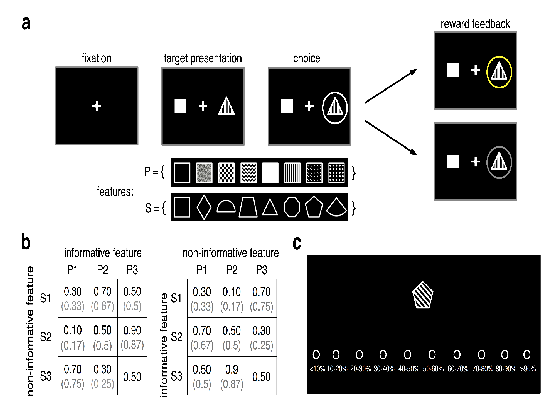

In [10]:
imshow(imread('./figures/Figure.png'))

### User Mannual

The following is a brief description of the user functions 
<ul>

    <li><b>Object-based RL model with decay</b>: Use the function $fMLchoicefit\_RL2conjdecay$
        <ul>
            <li><i>input</i>:
                <ul>
                    <li><i>session structure</i>
                    <li><i>choice parameters</i>
                </ul>
            </li>
            <li><i>output</i>:
                <ul>
                    <li><i>average negative log-likelihood</i>
                </ul>
            </li>
        </ul>
    </li>
    <li><b>Feature-based RL model with decay</b>: Use the function $fMLchoicefit\_RL2decay$
        <ul>
            <li><i>input</i>:
                <ul>
                    <li><i>session structure</i>
                    <li><i>choice parameters</i>
                </ul>
            </li>
            <li><i>output</i>:
                <ul>
                    <li><i>average negative log-likelihood</i>
                </ul>
            </li>
        </ul>
    </li>
    <li><b>Object-based RL model with decay</b>: Use the function $fMLchoiceLL\_RL2conjdecay$
        <ul>
            <li><i>input</i>:
                <ul>
                    <li><i>session structure</i>
                    <li><i>choice parameters</i>
                </ul>
            </li>
            <li><i>output</i>:
                <ul>
                    <li><i>trial-by-trial negative log-likelihood</i>
                </ul>
            </li>
        </ul>
    </li>
    <li><b>Feature-based RL model with decay</b>: Use the function $fMLchoiceLL\_RL2decay$
        <ul>
            <li><i>input</i>:
                <ul>
                    <li><i>session structure</i>
                    <li><i>choice parameters</i>
                </ul>
            </li>
            <li><i>output</i>:
                <ul>
                    <li><i>trial-by-trial negative log-likelihood</i>
                </ul>
            </li>
        </ul>
    </li>
    <li><b>Posterior probability of an object based on its features using Bayes' rule</b>: Use the function $myLL$
        <ul>
            <li><i>input</i>:
                <ul>
                    <li><i>probability of features</i>
                </ul>
            </li>
            <li><i>output</i>:
                <ul>
                    <li><i>posterior probability of an object</i>
                </ul>
            </li>
        </ul>
    </li>
    <li><b>Fit an exponential function of time</b>: Use the function $ffitexp$
        <ul>
            <li><i>input</i>:
                <ul>
                    <li><i>time</i>
                    <li><i>choice parameters</i>
                </ul>
            </li>
            <li><i>output</i>:
                <ul>
                    <li><i>exponential function</i>
                </ul>
            </li>
        </ul>
    </li>
</ul>

### Implementation

This code fits model parameters to subjects' choice behavior using maximum likelihood (ML) method.

## Results

In [ ]:

clc
clear 
close all

%%
% initializing the values for fit
nrep              = 5 ;                         % how many times to repeat each fit
op                = optimset;                   % generate optimization options structure
warning('off')
subjects          = {'ad01', 'ag01', 'ah01', 'al01', 'av01', 'aw01', 'bc01', 'bd01', ...
                     'bf01', 'bh01', 'bj01', 'bl01', 'bn01'} ;

%% loop over all the subjects
for cnt_sbj = 1:length(subjects)
    % load input and subjects' data
    inputname    = ['./inputs/input_',    subjects{cnt_sbj} , '.mat'] ; 
    resultsname  = ['./SubjectData/PRL_', subjects{cnt_sbj} , '.mat'] ;
    
    load(inputname)
    load(resultsname)
    
    flaginf(cnt_sbj,1)            = expr.flaginf ;                 % which dimension was more informative at first
    rew{cnt_sbj,1}                = results.reward ;

    % generate fitting session data
    sesdata.sig                   = 0.2 ;
    sesdata.input                 = input ;
    sesdata.expr                  = expr ;
    sesdata.results               = results ;
    
    % initialize fit performance
    fvalminRL2_decay              = length(sesdata.results.reward) ;
    fvalminRL2conj_decay          = length(sesdata.results.reward) ;

    % reapeat each fit to avoid finding local minima
    for cnt_rep = 1:nrep
        disp(['-----------------------------------------------------------'])
        disp(['Subject: ', num2str(cnt_sbj),', Repeat: ', num2str(cnt_rep)])

        %% fitting model: RL2 decay
        Nparam                           = 6 ;
        ipar                             = rand(1,Nparam)  ;
        [xpar fval exitflag output]      = fminsearch(@fMLchoicefit_RL2v2decay, ipar, op, sesdata) ;
        if fval <= fvalminRL2_decay
            xpar([4:6])                  = 1./(1+exp(-(xpar([4:6]))./sesdata.sig) ) ;
            fvalminRL2_decay             = fval ;
            mlparRL2_decay{cnt_sbj}(1:6) = xpar(1:6) ;
            mlparRL2_decay{cnt_sbj}(100) = fval ;
            mlparRL2_decay{cnt_sbj}(101) = fval./length(sesdata.results.reward) ;
            mlparRL2_decay{cnt_sbj}(102) = output.iterations;
            mlparRL2_decay{cnt_sbj}(103) = exitflag ;
        end
        
        %% fitting model: RL2 conjunction decay
        NparamBasic                      = 5 ;
        ipar                             = rand(1,Nparam)  ;
        [xpar fval exitflag output]      = fminsearch(@fMLchoicefit_RL2conjdecay, ipar, op, sesdata) ;
        if fval <= fvalminRL2conj_decay
            xpar([3:5])                      = 1./(1+exp(-(xpar([3:5]))./sesdata.sig) ) ;
            fvalminRL2conj_decay             = fval ;
            mlparRL2conj_decay{cnt_sbj}(1:5) = (xpar(1:5)) ;
            mlparRL2conj_decay{cnt_sbj}(100) = fval ;
            mlparRL2conj_decay{cnt_sbj}(101) = fval./length(sesdata.results.reward) ;
            mlparRL2conj_decay{cnt_sbj}(102) = output.iterations;
            mlparRL2conj_decay{cnt_sbj}(103) = exitflag ;
        end
    end
end

% save ./files/MdPRLAnalysisExp3
% save ./files/MdPRLAnalysisExp3_[your version]

### Average goodness-of-fit over time

This code reads the fitted parametrs from the file and calculates trial-by-trial negative log likelihood. we plot the average trial-by-trial log likelihood of all subjects over the time course of an experiment.

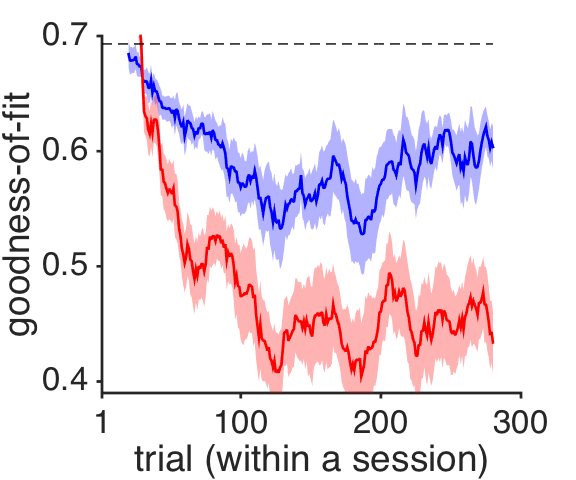

In [13]:

clc
clear 
close all

%%

load('./files/MdPRLAnalysisExp3') ;
% load('./files/MdPRLAnalysisExp3_[your version]') ;

RL2_decay           = cat(1,mlparRL2_decay{:}) ;
RL2conj_decay       = cat(1,mlparRL2conj_decay{:}) ; 
test                = str2func('signrank') ;

%%

clear sesdata
for cnt_sbj = 1:length(subjects)
    % load input and subjects' data
    inputname    = ['./inputs/input_',    subjects{cnt_sbj} , '.mat'] ; 
    resultsname  = ['./SubjectData/PRL_', subjects{cnt_sbj} , '.mat'] ;
    
    load(inputname)
    load(resultsname)

    % generate fitting session data
    sesdata.sig                   = 0.2 ;
    sesdata.input                 = input ;
    sesdata.expr                  = expr ;
    sesdata.results               = results ;

    % fitting model: RL2 decay
    xpar                             = RL2_decay(cnt_sbj, 1:6) ;
    LLAll_RL2(cnt_sbj,:)             = fMLchoiceLL_RL2v2decay(xpar, sesdata) ;
    
    % RL2 conjunction decay
    xpar                             = RL2conj_decay(cnt_sbj, 1:5) ;
    LLAll_RL2conj(cnt_sbj,:)         = fMLchoiceLL_RL2conjdecay(xpar, sesdata) ;
end

%%

wSize               = 20 ;
% average each subject's first half and second half
LL1                 = cat(2, LLAll_RL2') ;
LL1                 = mean(reshape(LL1, [], 2, length(subjects)),2) ;
LL1                 = reshape(LL1,[], length(subjects)) ;

LL2                 = cat(2, LLAll_RL2conj') ;
LL2                 = mean(reshape(LL2, [], 2, length(subjects)),2) ;
LL2                 = reshape(LL2,[], length(subjects)) ;

% filter data using a moving avreage box
uX                  = wSize:280 ;
X1                  = filter(ones(1,wSize)/wSize,1,LL1) ;
X1                  = X1(wSize:end,:) ;
mu1                 = mean(X1,2)' ;
sd1                 = std(X1')./sqrt(length(subjects)) ;

X2                  = filter(ones(1,wSize)/wSize,1,LL2) ;
X2                  = X2(wSize:end,:) ;
mu2                 = mean(X2,2)' ;
sd2                 = std(X2')./sqrt(length(subjects)) ;

% prepare for patch
x1                  = [uX fliplr(uX)];
y1                  = [mu1+sd1 fliplr(mu1-sd1)];

x2                  = [uX fliplr(uX)];
y2                  = [mu2+sd2 fliplr(mu2-sd2)];

figure(1)
hold on
hpatch    = patch(x1,y1,'b'); 
set(hpatch,'EdgeColor','none'); 
set(hpatch,'FaceColor',[0 .0 1]); 
hline     = plot(uX,mu1,'b-'); 
set(hline,'LineWidth',2); 
set(hline,'Color','b'); 
box off
alpha(hpatch,0.3);

hpatch    = patch(x2,y2,'r'); 
set(hpatch,'EdgeColor','none');
set(hpatch,'FaceColor',[1.0 .0 0]); 
hline     = plot(uX,mu2,'r-'); 
set(hline,'LineWidth',2); 
set(hline,'Color','r'); 
box off
alpha(hpatch,0.3);

plot(1:280, -log(0.5)*ones(1,280), '--k')
set(gca,'FontName','Helvetica','FontSize',25,'FontWeight','normal','LineWidth',2,'XTick',[1 100:100:350],...
        'ytick',0.0:0.1:0.7)
set(gca,'TickDir','out')
ylabel('goodness-of-fit')
xlabel('trial (within a session)')
axis([1 300 0.39 .7])

cd ./figures
FigW = 6;
FigH = 5 ;
set(gcf,'units','centimeters')
set(gcf,'position',[10,10,3*FigW,3*FigH],'PaperSize',[FigW FigH],'PaperPosition',[0,0,FigW,FigH],'units','centimeters');  
print('-dpdf','-r500','LLtimeExp3.pdf')
cd ../


### The time course of model adoption

This code reads estimation sessions and calculates the indices for object-based behavior over time.


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the default value of the function tolerance.




Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the default value of the function tolerance.




Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the default value of the function tolerance.





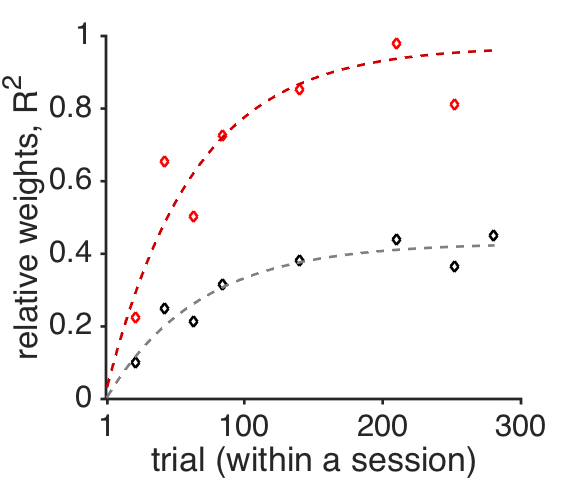

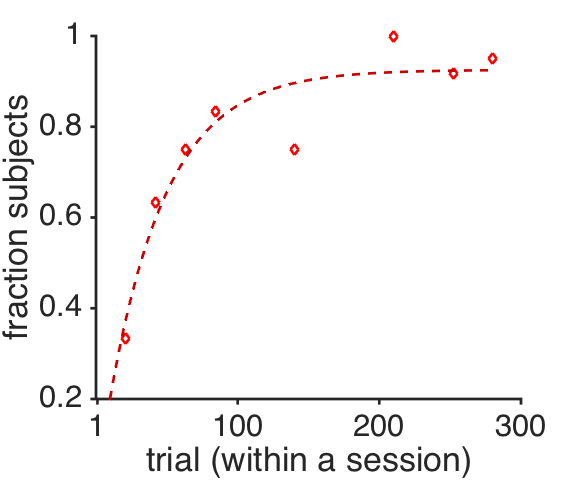

In [14]:

clc
clear 
close all

%%

load('./files/MdPRLAnalysisExp3')
% load('./files/MdPRLAnalysisExp3_[your version]') ;
test                = str2func('signrank') ;

% for the subset of subjects with fewer number of estimations
probeTrialsAll      = [21 42 63 84 140 210 252 280, 301 322 343 364 420 490 532 560] ;
% initilaizing
rObj               = nan*ones(length(probeTrialsAll), length(subjects)) ;
rFt                = rObj ;

%%

for cnt_probe = 1:length(probeTrialsAll)
    pEstAll{cnt_probe}   = nan*ones(length(subjects),8) ;
end

clear sesdata
for cnt_sbj = 1:length(subjects)
    % load input and subjects' data
    inputname    = ['./inputs/input_',    subjects{cnt_sbj} , '.mat'] ; 
    resultsname  = ['./SubjectData/PRL_', subjects{cnt_sbj} , '.mat'] ;
    
    load(inputname)
    load(resultsname)
    
    probStim{1}     = expr.prob{1} ;
    probStim{2}     = expr.prob{2} ;
    cntprobe_half   = length(results.probEst)/2 ;
    cnt_probeMap    = [1:length(probeTrialsAll)] ;

    for cnt_probe = 1:length(results.probEst)
        
        % read the estimated Odds ratio and convert to probability
        probEst     = results.probEst{cnt_probe} ;
        probEst     = probEst./(1+probEst) ;
        cnt_probeAll= find(probeTrialsAll==expr.trialProbe(cnt_probe)) ;
        
        % read the actual probability 
        pObj         = probStim{2-mod(ceil(expr.trialProbe(cnt_probe)/expr.NtrialsShort),2)} ;
        pObj(pObj==0)= nan ;                             % remove the 9th object
        pObj         = round(pObj/0.05)*0.05 ;           % round up the numbers
        

        % for those who started with expr.flaginf==2
        if (expr.flaginf==1 && cnt_probe<=cntprobe_half) || (expr.flaginf==2 && cnt_probe>cntprobe_half)
        else
            probEst         = probEst' ;
            pObj            = pObj' ;
        end
        
        % for those that dont have all the estimation sessions
        if ~isempty(cnt_probeAll)
            pFt                                = myLL(ones(3,1)*nanmean(pObj,1), nanmean(pObj,2)*ones(1,3)) ;
            pEstAll{cnt_probeAll}(cnt_sbj,:)   = probEst(1:8) ;
            pObjAll{cnt_probeAll}(cnt_sbj,:)   = pObj(1:8) ;
            pFtAll{cnt_probeAll}(cnt_sbj,:)    = pFt(1:8) ;
            [rObj(cnt_probeAll, cnt_sbj), prObj(cnt_probeAll, cnt_sbj)]  = corr(probEst(1:8)' , pObj(1:8)') ;
            [rFt(cnt_probeAll, cnt_sbj),  prFt(cnt_probeAll, cnt_sbj)]   = corr(probEst(1:8)' , pFt(1:8)') ;
        end
    end
end

%%

% remove those that correlation is not significant
rObj(prObj>0.05 & prFt>0.05)    = nan ;
rFt(prObj>0.05 & prFt>0.05)     = nan ;
R                               = sum((rObj-rFt)'>0)./sum(~isnan(rObj')) ;
R                               = nanmean([R(1:8); R(9:end)])' ;

figure(1)
hold on
p = polyfit(probeTrialsAll(1:8)',R, 1) ;
plot(probeTrialsAll(1:8),R,'d', 'color', 'r','LineWidth',2)
set(gca,'FontName','Helvetica','FontSize',23,'FontWeight','normal','LineWidth',2,'yTick',0:0.2:1,'Xtick',[1 100:100:300], 'tickdir', 'out')
box off
axis([0 300 0.2 1])

% fit an exponential to data
x0                                     = [1*rand(1), 1*rand(1), 500*rand(1)];
lb                                     = [0, 0, 0]; 
ub                                     = [1, 1, 500];
[parE, resnorm]                        = lsqcurvefit(@ffitexp, x0,probeTrialsAll(1:8),R',lb,ub);
Xfit                                   = 1:280 ;
Yfit                                   = ffitexp(parE,Xfit) ;
plot(Xfit,Yfit,'--', 'color', 0.8*[1 0 0],'LineWidth',2) 
xlabel('trial (within a session)')
ylabel('fraction subjects')

cd ./figures
FigW = 6;
FigH = 5;
set(gcf,'units','centimeters')
set(gcf,'position',[10,10,3*FigW,3*FigH],'PaperSize',[FigW FigH],'PaperPosition',[0,0,FigW,FigH],'units','centimeters');  
print('-dpdf','-r500','RindexExp3.pdf')
cd ../

%%

clear b
for cnt_probe = 1:length(probeTrialsAll)/2
    X            = [pEstAll{cnt_probe}; pEstAll{8+cnt_probe}] ;
    Y1           = [pObjAll{cnt_probe}; pObjAll{8+cnt_probe}] ;
    Y2           = [pFtAll{cnt_probe};  pFtAll{8+cnt_probe}] ;
    X            = X(:) ;
    Y            = [ones(size(Y1(:))) Y1(:) Y2(:)] ;

    b(:,cnt_probe)  = regress(X,Y) ;
    yCalc1          = Y*b(:,cnt_probe) ;
    y               = X ;
    Rsq(:,cnt_probe)= 1 - nansum((y - yCalc1).^2)/nansum((y - nanmean(y)).^2) ;
    res1(cnt_probe) = nansum(X-Y*b(:,cnt_probe)) ;
end

figure(2)
hold on
plot(probeTrialsAll(1:8), (b(2,:)./(sum(b(end-1:end,:))))','dr', 'LineWidth',2)
plot(probeTrialsAll(1:8), Rsq','dk', 'LineWidth',2)

% fit an exponential to data
x0                                     = [1*rand(1), 1*rand(1), 500*rand(1)];
lb                                     = [0, 0, 0]; 
ub                                     = [1, 1, 500];
[parE, resnorm]                        = lsqcurvefit(@ffitexp, x0,probeTrialsAll(1:8),Rsq,lb,ub);
Xfit                                   = 1:280 ;
Yfit                                   = ffitexp(parE,Xfit) ;
plot(Xfit,Yfit,'--', 'color', 0.5*[1 1 1],'LineWidth',2) 

x0                                     = [1*rand(1), 1*rand(1), 500*rand(1)];
lb                                     = [0, 0, 0]; 
ub                                     = [1, 1, 500];
[parE, resnorm]                        = lsqcurvefit(@ffitexp, x0,probeTrialsAll(1:8),(b(2,:)./(sum(b(end-1:end,:)))),lb,ub);
Xfit                                   = 1:280 ;
Yfit                                   = ffitexp(parE,Xfit) ;
plot(Xfit,Yfit,'--', 'color', 0.8*[1 0 0],'LineWidth',2) 

set(gca,'FontName','Helvetica','FontSize',23,'FontWeight','normal','LineWidth',2,'yTick',0:0.2:1,'Xtick',[1 100:100:300], 'tickdir', 'out')
box off
axis([0 300 0 1])
xlabel('trial (within a session)')
ylabel('relative weights, R^2')

cd ./figures
FigW = 6;
FigH = 5;
set(gcf,'units','centimeters')
set(gcf,'position',[10,10,3*FigW,3*FigH],'PaperSize',[FigW FigH],'PaperPosition',[0,0,FigW,FigH],'units','centimeters');  
print('-dpdf','-r500','WindexExp3.pdf')
cd ../
